In [1]:
import xarray
import pathlib
import matplotlib.pyplot as plt

In [2]:
economic_path = pathlib.Path('../../workflow/output/skopje-z19/economic')

In [3]:
ds = xarray.open_dataset(str(economic_path / 'lcoe.nc'))

In [4]:
ds.info()

xarray.Dataset {
dimensions:
	superst_id = 179 ;
	location = 514 ;
	time = 17520 ;

variables:
	int64 superst_id(superst_id) ;
	object superst_wkt_latlon(superst_id) ;
	object superst_wkt_xy(superst_id) ;
	uint8 superst_seg_class(superst_id) ;
	float64 superst_img_center_lat(superst_id) ;
	float64 superst_img_center_lon(superst_id) ;
	float64 superst_area(superst_id) ;
	int64 location(location) ;
	float64 section_lat(location) ;
	float64 section_lon(location) ;
	float64 section_elev(location) ;
	float64 section_capacity(location) ;
	float64 section_tilt(location) ;
	float64 section_azimuth(location) ;
	int64 section_flat(location) ;
	float64 section_area(location) ;
	object section_wkt_latlon(location) ;
	object section_wkt_xy(location) ;
	object section_pv_layout_wkt(location) ;
	float64 section_panel_area(location) ;
	int64 section_n_panels(location) ;
	float64 section_modules_cost(location) ;
	object section_pv_model(location) ;
	datetime64[ns] time(time) ;
	float64 section_capacity

In [5]:
print(f'Mean LCOE: {ds.section_lcoe.mean().item()} €/MWh.')

Mean LCOE: 67.21835491426913 €/MWh.


Text(0.5, 0, 'Rooftop sections')

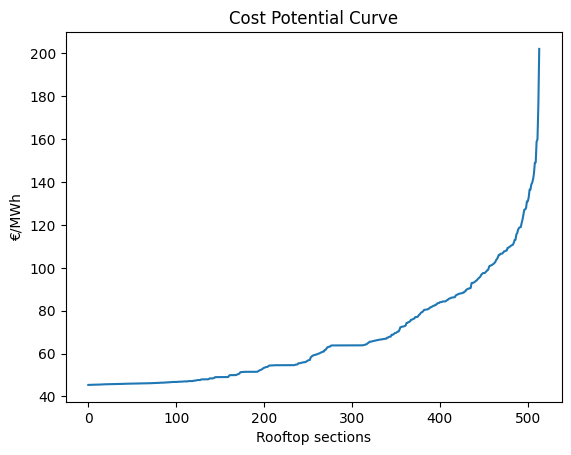

In [6]:
plt.title('Cost Potential Curve')
plt.plot(sorted(ds.section_lcoe))
plt.ylabel('€/MWh')
plt.xlabel('Rooftop sections')

Mean LCOE below threshold: 60.44625260568422 €/MWh.
Total yearly generation below threshold: 3379905.450242565 kWh.


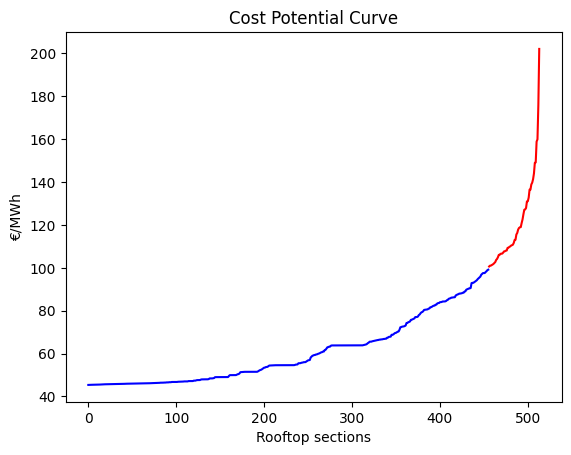

In [7]:
# Define a threshold MWh and calculate those below it
threshold_mw = 100

below = ds.where(ds.section_lcoe < threshold_mw, drop=True)
above = ds.where(ds.section_lcoe >= threshold_mw, drop=True)

below_x = range(len(below.location))
above_x = range(len(below.location), len(ds.location))

plt.title('Cost Potential Curve')
plt.plot(below_x, sorted(below.section_lcoe), color='blue')
plt.plot(above_x, sorted(above.section_lcoe), color='red')
plt.ylabel('€/MWh')
plt.xlabel('Rooftop sections')

print(f'Mean LCOE below threshold: {below.section_lcoe.mean().item()} €/MWh.')
print(f'Total yearly generation below threshold: {below.section_yearly_system_generation.sum().item() / 1000} kWh.')

In [8]:
ds.section_modules_cost

<xarray.DataArray 'section_modules_cost' (location: 514)>
array([1400., 2450., 1750., ..., 1400., 1750., 7350.])
Coordinates:
  * location  (location) int64 0 1 2 3 4 5 6 7 ... 507 508 509 510 511 512 513

In [9]:
total_budget = 1000000 # €
print(f'Total initial investment: {total_budget}€')

current_budget = 0
locs = []
for cost in ds.sortby(ds.section_lcoe, ascending=True).section_modules_cost:
    if (current_budget + cost) <= total_budget:
        print(f'Can invest {cost.item()}€ in section {cost.location.item()}')
        current_budget += cost
        locs.append(cost.location)

possible_ds = ds.isel(location=locs)

print(f'Mean LCOE investing: {possible_ds.section_lcoe.mean().item()} €/MWh.')
print(f'Total yearly generation: {possible_ds.section_yearly_system_generation.sum().item() / 1000} kWh.')

Total initial investment: 1000000€
Can invest 197050.0€ in section 27
Can invest 75600.0€ in section 448
Can invest 83300.0€ in section 105
Can invest 65100.0€ in section 169
Can invest 48650.0€ in section 476
Can invest 46900.0€ in section 469
Can invest 50750.0€ in section 158
Can invest 40600.0€ in section 443
Can invest 37450.0€ in section 501
Can invest 34650.0€ in section 504
Can invest 33950.0€ in section 492
Can invest 36750.0€ in section 188
Can invest 28700.0€ in section 493
Can invest 29050.0€ in section 447
Can invest 24500.0€ in section 505
Can invest 25550.0€ in section 77
Can invest 22750.0€ in section 320
Can invest 19950.0€ in section 104
Can invest 19250.0€ in section 338
Can invest 18900.0€ in section 316
Can invest 17850.0€ in section 309
Can invest 17150.0€ in section 489
Can invest 16800.0€ in section 508
Can invest 8750.0€ in section 487
Mean LCOE investing: 45.56696803914091 €/MWh.
Total yearly generation: 1378593.4159241214 kWh.
